In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

In [2]:
# loading the dataset
# the dataset was scraped from https://www.enforcementtracker.com/
# and represents a public list of fines that 
# data protection authorities within the EU have imposed under the EU General Data Protection Regulation (GDPR, DSGVO).
df = pd.read_csv("./dataset.csv")
df_wo_dup =  df.drop_duplicates()
df_wo_dup.to_csv("./dataset_wo_dup.csv")
print(df.shape,df_wo_dup.shape)
df = pd.read_csv("./dataset_wo_dup.csv",index_col=0)

(2562, 10) (2454, 10)


In [3]:
df.duplicated().sum()

0

In [4]:
# claryifying colum names
print(df.columns)
df.columns = ['country', 'agency', 'date_of_decision', 'fine_amount',
       'controller', 'sector', 'list_of_quoted_articles', 'type_of_fine', 'summary_of_case',
       'links']

Index(['country', 'agency', 'date_of_decision', 'fine_amount_euro',
       'controller_processor', 'sector', 'quoted_articles', 'type', 'summary',
       'links'],
      dtype='object')


### cleaning fine_amount

In [5]:
cleaned_df = df.copy()

In [6]:
print(df['fine_amount'].dtype)
print(df['fine_amount'].value_counts())

object
fine_amount
2,000        153
5,000        128
3,000        126
10,000       110
1,000        103
            ... 
3,700,000      1
8,300          1
14,500         1
20,900         1
588            1
Name: count, Length: 481, dtype: int64


In [7]:
# used snippet of code found here https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float
# most of the fine amounts are in the format "7,000" so I replace "," with ""
# 141 rows have a non-numeric format 
df['fine_amount'] = df['fine_amount'].str.replace(',', '')
cleaned_df['fine_amount'] = cleaned_df['fine_amount'].str.replace(',', '')
rows_with_nan = pd.to_numeric(df['fine_amount'], errors='coerce')
rows_with_nan.isnull().sum()

141

In [8]:
# we have 2313 fine cases with defined numerical fine amount
cleaned_df.shape

(2454, 10)

In [9]:
# https://stackoverflow.com/questions/35682719/drop-rows-with-a-question-mark-value-in-any-column-in-a-pandas-dataframe
# Remove rows with any column having 'Unknown'
# df_any = df[~(df == 'Unknown').any(axis=1)]
# df_any.shape

In [10]:
# There are 96 rows with Unknown fine amount
# the other 45 rows are specified in range of value, not the actual value
# I'll remove all of those as there no imputation that can be done
print(df[rows_with_nan.isnull()]['fine_amount'].value_counts())
#print(df[ df['fine_amount'] == "Unknown"])


fine_amount
Unknown                                     96
Fine in four-digit amount                   10
Fine in three-digit amount                  10
Fine in five-digit amount                    9
Only intention to issue fine                 6
Fine amount between EUR 100 and EUR 1000     2
Fine amount between EUR 500 and EUR 4000     1
Fine amount between EUR 200 and EUR 1000     1
Fine in six-digit amount                     1
Fine amount between EUR 400 and EUR 600      1
Fine amount between EUR 300 and EUR 400      1
Fine amount between EUR 50 and EUR 100       1
Fine amount between EUR 350 and EUR 1000     1
Fine amount between EUR 50 and EUR 800       1
Name: count, dtype: int64


In [11]:
# we have 2313 fine cases with defined numerical fine amount
cleaned_df = cleaned_df[~(rows_with_nan.isnull())]
cleaned_df['fine_amount'] = pd.to_numeric(cleaned_df['fine_amount'])
cleaned_df.shape

(2313, 10)

### cleaning others

In [12]:
# df['quoted_articles']

In [13]:
for col in df.columns:
    print(df[col].value_counts())
    input()

country
SPAIN              894
ITALY              384
GERMANY            194
ROMANIA            187
POLAND              79
GREECE              70
HUNGARY             68
FRANCE              62
NORWAY              53
CYPRUS              44
SWEDEN              41
BELGIUM             41
LUXEMBOURG          32
CROATIA             29
IRELAND             28
THE NETHERLANDS     28
CZECH REPUBLIC      27
DENMARK             26
BULGARIA            25
AUSTRIA             25
ICELAND             21
FINLAND             21
UNITED KINGDOM      15
MALTA               14
LITHUANIA           12
SLOVAKIA             9
LATVIA               8
PORTUGAL             7
ESTONIA              6
ISLE OF MAN          3
LIECHTENSTEIN        1
Name: count, dtype: int64


agency
Spanish Data Protection Authority (aepd)                                                  894
Italian Data Protection Authority (Garante)                                               384
Romanian National Supervisory Authority for Personal Data Processing (ANSPDCP)            187
Polish National Personal Data Protection Office (UODO)                                     78
Hellenic Data Protection Authority (HDPA)                                                  70
Hungarian National Authority for Data Protection and the Freedom of Information (NAIH)     68
French Data Protection Authority (CNIL)                                                    62
Norwegian Supervisory Authority (Datatilsynet)                                             53
Cypriot Data Protection Commissioner                                                       44
Belgian Data Protection Authority (APD)                                                    41
Data Protection Authority of Hamburg                 

date_of_decision
2022          70
2021          53
2023          38
2020          38
2019          24
              ..
2022-03-02     1
2022-03-03     1
2022-03-04     1
2022-03-21     1
2024-09-27     1
Name: count, Length: 936, dtype: int64


fine_amount
2000       153
5000       128
3000       126
10000      110
1000       103
          ... 
3700000      1
8300         1
14500        1
20900        1
588          1
Name: count, Length: 481, dtype: int64


controller
Private individual                           184
Unknown                                      123
Company                                       73
Vodafone España, S.A.U.                       62
Physician                                     20
                                            ... 
ADSL HOUSE, S.L.                               1
EL RACO DEL PIS INVERSIONES S.L.               1
AIO E-COMMERCE, S.L.                           1
ACKERMANN & SCHWARTZ ATTORNEYS AT LAW SLP      1
Alza.cz a.s.                                   1
Name: count, Length: 1644, dtype: int64


sector
Industry and Commerce                   483
Individuals and Private Associations    349
Media, Telecoms and Broadcasting        301
Public Sector and Education             264
Finance, Insurance and Consulting       242
Health Care                             228
Not assigned                            162
Employment                              154
Transportation and Energy               124
Accomodation and Hospitalty              79
Real Estate                              68
Name: count, dtype: int64


list_of_quoted_articles
Art. 5 (1) c) GDPR                                                                       157
Art. 6 (1) GDPR                                                                          150
Art. 5 GDPR, Art. 6 GDPR                                                                 121
Art. 13 GDPR                                                                             107
Art. 32 GDPR                                                                              93
                                                                                        ... 
Art. 5 (1) a) GDPR, Art. 6 GDPR, Art. 9 GDPR, Art. 13 (1) c) GDPR, Regulation 21 PECR      1
Art. 5 (1) a), f) GDPR, Art. 6 (1) a) GDPR                                                 1
Art. 5 (1) a), b) GDPR, Art. 6 (1) GDPR, Art. 12 (1) GDPR, Art. 13 GDPR                    1
Art. 5 (1) a) GDPR, Art. 5 (2) GDPR, Art. 12 (3), (4) GDPR, Art. 31 GDPR                   1
Art. 6 (1) GDPR, Art. 5 (1) d) GDPR           

type_of_fine
Insufficient legal basis for data processing                                         732
Non-compliance with general data processing principles                               640
Insufficient technical and organisational measures to ensure information security    417
Insufficient fulfilment of data subjects rights                                      231
Insufficient fulfilment of information obligations                                   201
Insufficient cooperation with supervisory authority                                  128
Insufficient fulfilment of data breach notification obligations                       47
Insufficient involvement of data protection officer                                   23
Unknown                                                                               23
Insufficient data processing agreement                                                12
Name: count, dtype: int64


summary_of_case
Failure to respond to the data subject's request for access to their data in a timely manner.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  6
The Spanish DPA (AEPD) has fined a private individual EUR 300 for failing to provide sufficient informa

links
https://www.zaftda.de/tb-bundeslaender/bremen/832-5-tb-dsgvo-lfd-bremen-2022-o-drs-nr-vom-24-03-2023/file                                                                                                                                                    13
https://www.zaftda.de/tb-bundeslaender/berlin/802-tb-lfd-berlin-2021-ohne-drs-nr-vom-24-05-2022/file                                                                                                                                                         13
https://www.cnil.fr/fr/les-sanctions-prononcees-par-la-cnil                                                                                                                                                                                                  12
https://azop.hr/izreceno-novih-10-upravnih-novcanih-kazni/                                                                                                                                                                        

In [14]:
df.iloc[0]


country                                                              IRELAND
agency                                  Data Protection Authority of Ireland
date_of_decision                                                  2024-09-27
fine_amount                                                         91000000
controller                                    Meta Platforms Ireland Limited
sector                                      Media, Telecoms and Broadcasting
list_of_quoted_articles    Art. 5 (1) f) GDPR, Art. 32 (1) GDPR, Art. 33 ...
type_of_fine               Insufficient technical and organisational meas...
summary_of_case            The Irish DPA (DPC) has imposed a fine of EUR ...
links                      https://www.dataprotection.ie/en/news-media/pr...
Name: 0, dtype: object

### Creating columns to categorize ranges of fine amount

In [15]:
# using example from pandas https://pandas.pydata.org/docs/user_guide/categorical.html
# creating groups every 100k 
fines_groups =[
    (0,99999),
    (99999,999999),
    #(999999,9999999),
]
labels = [f"{a} - {b}" for (a,b) in fines_groups] 
fine_groups = pd.cut(cleaned_df['fine_amount'], [0, 99999, 9999999], right=False, labels=labels)

In [16]:
fine_groups.value_counts()

fine_amount
0 - 99999         1987
99999 - 999999     293
Name: count, dtype: int64

### Creating Feature number of cited articles

### Creating Feature year of decision

In [24]:
# using snippet of code from https://stackoverflow.com/questions/59101883/convert-irregular-date-format-to-year-only-in-pandas
# There are only 18 fines with "Unknown" date of decision after processing the dates
# I noticed the index of all the 18 fines with "Unknown" values are in the bottom of the dataset
# since the dataset is ordered by date, it seems they are just before the earliest year 
# so i will attribute them to 2018 (the first year in the dataset)
cleaned_df['year'] = cleaned_df['date_of_decision'].astype(str).str.extract('(\d{4})').astype(str)
cleaned_df['year'] = pd.to_datetime(cleaned_df['year'], errors='coerce').dt.year
print(cleaned_df['year'].isnull())
fines_with_missing_date = cleaned_df[cleaned_df['year'].isnull()]
print(fines_with_missing_date['date_of_decision'].value_counts())
print(fines_with_missing_date['date_of_decision'].index.values)
# using a snippet from https://stackoverflow.com/questions/12307099/modifying-a-subset-of-rows-in-a-pandas-dataframe
cleaned_df.loc[fines_with_missing_date.index.values, 'year'] = 2018
print(cleaned_df['year'].value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
2557     True
2558     True
2559     True
2560     True
2561     True
Name: year, Length: 2313, dtype: bool
date_of_decision
Unknown    18
Name: count, dtype: int64
[2540 2541 2542 2543 2544 2545 2546 2547 2548 2553 2554 2555 2556 2557
 2558 2559 2560 2561]
year
2022.0    573
2023.0    527
2021.0    472
2020.0    359
2024.0    189
2019.0    163
2018.0     30
Name: count, dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wk/7ws649vj6rd1m3gdp3qykcz80000gp/T/ipykernel_92352/3777915758.py:6: SyntaxWarning: invalid escape sequence '\d'
  cleaned_df['year'] = cleaned_df['date_of_decision'].astype(str).str.extract('(\d{4})').astype(str)


## Exploratory Data Analysis

### what dates intervals from the collected fines
    - latest    --  oldest with date
    - 2024-09-27 -- 2018-10-25

In [ ]:
# first is the latest fine on the date of collection, -28 is the oldest fine with and decision
#   latest    --  oldest with date
#  2024-09-27 -- 2018-10-25
print(cleaned_df.iloc[0])
print(cleaned_df.iloc[-17])

### analysing the frequency and distribution of Fines

In [38]:
# I create a pandas dataframe with 
# 50% of the fines are under 6.900 euros
# 75% of the fines are under 40.000 euros
# 90% of the fines are under 200.000 euros
# 95% of the fines are under 840.000 euros
# https://stackoverflow.com/questions/23833763/count-number-of-elements-in-each-column-less-than-x
#print(cleaned_df['fine_amount'].describe())
fine_amount_quantiles = pd.DataFrame({"fine_amount":cleaned_df['fine_amount'].quantile([0.05*i for i in range(1,20)])})
#fine_amount_quantiles['fine_amount'].quantile([0.05*i for i in range(1,20)]).apply(lambda v: cleaned_df['fine_amount'].lt(v).sum()))
fine_amount_quantiles["fines_less_than_amount"] = fine_amount_quantiles["fine_amount"].apply(lambda v: cleaned_df['fine_amount'].lt(v).sum())
fine_amount_quantiles["fines_greater_than_amount"] = fine_amount_quantiles["fine_amount"].apply(lambda v: cleaned_df['fine_amount'].gt(v).sum())
fine_amount_quantiles = fine_amount_quantiles.reset_index()
fine_amount_quantiles = fine_amount_quantiles.rename(columns={"index":"quantile"})
print(fine_amount_quantiles)


    quantile  fine_amount  fines_less_than_amount  fines_greater_than_amount
0       0.05        360.0                     113                       2196
1       0.10        600.0                     195                       2068
2       0.15       1000.0                     275                       1935
3       0.20       1500.0                     420                       1843
4       0.25       2000.0                     511                       1649
5       0.30       2500.0                     680                       1614
6       0.35       3000.0                     719                       1468
7       0.40       4000.0                     877                       1380
8       0.45       5000.0                     949                       1236
9       0.50       6900.0                    1156                       1156
10      0.55      10000.0                    1240                        963
11      0.60      13000.0                    1387                        923

['360', '600', '1000', '1500', '2000', '2500', '3000', '4000', '5000', '6900', '10000', '13000', '20000', '27039', '40000', '56000', '81600', '200000', '840400']
[2196, 2068, 1935, 1843, 1649, 1614, 1468, 1380, 1236, 1156, 963, 923, 750, 694, 576, 459, 347, 219, 116]


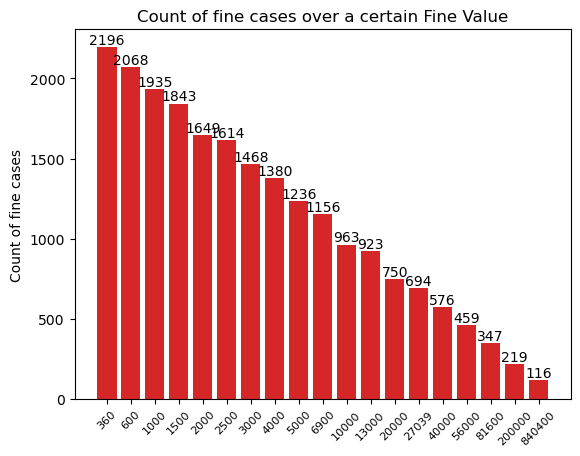

In [39]:
# adapted example from https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
fig, ax = plt.subplots()

labels = [str(int(v)) for v in fine_amount_quantiles['fine_amount']]# fine_amount_quantiles['fine_amount'].values
counts = [v for v in fine_amount_quantiles['fines_greater_than_amount'].values]# fine_amount_quantiles['fines_greater_than_amount'].values
bar_labels = ['red' for v in labels] #'blue', '_red', 'orange']
bar_colors = ['tab:red' for v in labels]  #'tab:blue', 'tab:red', 'tab:orange']

bars = ax.bar(labels, counts, color=bar_colors)#label=bar_labels,)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # 0.5 is offset for label placement
            f'{height}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels by 45 degrees and set font size to 8
ax.set_ylabel('Count of fine cases')
ax.set_title('Count of fine cases over a certain Fine Value')
#ax.legend(title='Fruit color')

print(labels)
print(counts)
plt.show()


### analysing the top 10 highest of Fines 

#### All top 10 fines are over 90million euros

In [102]:
sorted_cleaned_df = cleaned_df.sort_values(by='fine_amount', ascending=False)
top_10_fines = sorted_cleaned_df.head(10)
print(top_10_fines[['controller','agency','country','sector','fine_amount']])

                             controller  \
532      Meta Platforms Ireland Limited   
1584        Amazon Europe Core S.à.r.l.   
955                Meta Platforms, Inc.   
711      Meta Platforms Ireland Limited   
369                      TikTok Limited   
12    Uber Technologies Inc., Uber B.V.   
827      Meta Platforms Ireland Limited   
1530              WhatsApp Ireland Ltd.   
0        Meta Platforms Ireland Limited   
1361                         Google LLC   

                                                 agency          country  \
532                Data Protection Authority of Ireland          IRELAND   
1584     National Commission for Data Protection (CNPD)       LUXEMBOURG   
955                Data Protection Authority of Ireland          IRELAND   
711                Data Protection Authority of Ireland          IRELAND   
369                Data Protection Authority of Ireland          IRELAND   
12    Dutch Supervisory Authority for Data Protectio...  THE NETHERLAN

#### Are all top fines from "Big Tech"?

In [103]:
print(top_10_fines['sector'].value_counts())
print(top_10_fines.columns)
print(top_10_fines['controller'].value_counts())


sector
Media, Telecoms and Broadcasting    8
Industry and Commerce               1
Employment                          1
Name: count, dtype: int64
Index(['country', 'agency', 'date_of_decision', 'fine_amount', 'controller',
       'sector', 'list_of_quoted_articles', 'type_of_fine', 'summary_of_case',
       'links', 'year'],
      dtype='object')
controller
Meta Platforms Ireland Limited       4
Amazon Europe Core S.à.r.l.          1
Meta Platforms, Inc.                 1
TikTok Limited                       1
Uber Technologies Inc., Uber B.V.    1
WhatsApp Ireland Ltd.                1
Google LLC                           1
Name: count, dtype: int64


#### What is the proportion of the sum of the top related to all fines ?


In [104]:
sum(top_10_fines['fine_amount'])/sum(cleaned_df['fine_amount'])

0.8063463801276145

### analysing the distribution of Fines over the years

#### Sum of Fines over the years




In [89]:
group_by_year = cleaned_df.groupby(by="year")["fine_amount"].agg(["count","sum"])
group_by_year["cumsum"] = np.cumsum(group_by_year["sum"])
group_by_year["cumcount"] = np.cumsum(group_by_year["count"])
print(group_by_year)

        count         sum      cumsum  cumcount
year                                           
2018.0     30      759024      759024        30
2019.0    163    72756964    73515988       193
2020.0    359   171770179   245286167       552
2021.0    472  1283677183  1528963350      1024
2022.0    573   842154165  2371117515      1597
2023.0    527  2080596542  4451714057      2124
2024.0    189   567220857  5018934914      2313


In [95]:
def format_large_number(x):
    if x >= 1e9:
        return f"{x/1e9:.1f} billion"
    elif x >= 1e6:
        return f"{x/1e6:.1f} million"
    elif x >= 1e3:
        return f"{x/1e3:.1f} thousand"
    else:
        return str(x)
for column in group_by_year.select_dtypes(include=[np.number]).columns:
    group_by_year[column] = group_by_year[column].apply(format_large_number)
group_by_year = group_by_year[["count","cumcount","sum","cumsum"]]
print("\t\tAggregate Fines metrics\n")
print(group_by_year)

		Aggregate Fines metrics

       count      cumcount             sum          cumsum
year                                                      
2018.0    30            30  759.0 thousand  759.0 thousand
2019.0   163           193    72.8 million    73.5 million
2020.0   359           552   171.8 million   245.3 million
2021.0   472  1.0 thousand     1.3 billion     1.5 billion
2022.0   573  1.6 thousand   842.2 million     2.4 billion
2023.0   527  2.1 thousand     2.1 billion     4.5 billion
2024.0   189  2.3 thousand   567.2 million     5.0 billion
